<a href="https://colab.research.google.com/github/ncphung1405/bai-tap/blob/main/Ph%C3%A2n_t%C3%ADch_doanh_s%E1%BB%91_nh%C3%A0_h%C3%A0ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# 1. 2020 Restaurant's Sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns
import wordcloud

In [ ]:
data = pd.read_csv("Future50.csv")
data.dtypes

Rank            int64
Restaurant     object
Location       object
Sales           int64
YOY_Sales      object
Units           int64
YOY_Units      object
Unit_Volume     int64
Franchising    object
dtype: object

In [ ]:
data.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


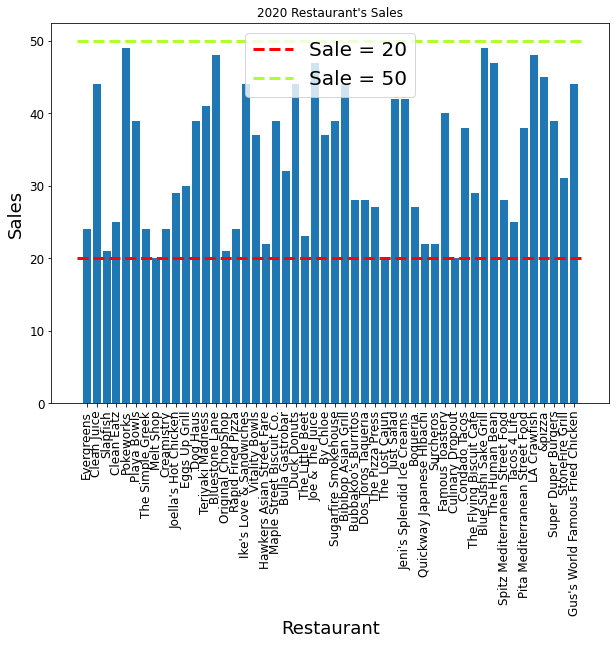

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(data.loc[:, "Restaurant"], data.loc[:, "Sales"])
plt.xlabel("Restaurant"
          ,fontsize=18)
plt.ylabel("Sales"
          ,fontsize=18)
plt.xticks(rotation="vertical"
         ,fontsize=12)
plt.yticks(fontsize=12)
plt.title("2020 Restaurant's Sales")

plt.hlines(20, -1, 50, color="r", linestyles="--", linewidth=3, label="Sale = 20")
plt.hlines(50, -1, 50, color="greenyellow", linestyles="--", linewidth=3, label="Sale = 50")
plt.legend(loc="upper center"
          ,fontsize=20)

plt.show()

From above picture, we can see that all of the restaurants' sales between 20 ~ 50.

# 2. Data Cleaning
1. Seperate the column, make the data in Location to City and Region, so we can find that which Region in America has most Sales.
2. If we directly groupby Region might find that there are two Calif. in the result but actually we only need one. Then we soon find out that there are spaces in front of Calif., so we need to fix it.

In [ ]:
# "YOY_Sales"、"YOY_Units": object -> float
data.loc[:, "New_YOY_Sales"] = data.loc[:, "YOY_Sales"].map(lambda x: x.split("%")[0]).astype(float)
data.loc[:, "New_YOY_Units"] = data.loc[:, "YOY_Units"].map(lambda x: x.split("%")[0]).astype(float)

# "Location" -> "Region" + "City"
data.loc[:, "City"] = data.loc[:, "Location"].map(lambda x: x.split(",")[0])
data.loc[:, "Region"] = data.loc[:, "Location"].map(lambda x: x.split(",")[1])

In [ ]:
data.loc[:, "Region"].unique()

array([' Wash.', ' N.C.', ' Calif.', '  N.J.', ' Pa.', ' N.Y.',
       '  Calif.', ' Ky.', ' S.C.', ' Colo.', ' Texas', ' Ohio', ' Fla.',
       ' Mo.', ' N.J.', ' Va.', ' Ga.', ' Ariz.', ' Neb.', ' Ore.',
       ' Ark.', ' D.C.', ' Tenn.'], dtype=object)

From above output, we can see that there are 'Calif.' and '   Calif.'
We need to remove blank in string.

In [ ]:
# Remove the spaces in string in data.loc[:, "Region"]
data.loc[:, "Region"] = data.loc[:, "Region"].map(lambda x: x.strip())
data.loc[:, "Region"].unique()

array(['Wash.', 'N.C.', 'Calif.', 'N.J.', 'Pa.', 'N.Y.', 'Ky.', 'S.C.',
       'Colo.', 'Texas', 'Ohio', 'Fla.', 'Mo.', 'Va.', 'Ga.', 'Ariz.',
       'Neb.', 'Ore.', 'Ark.', 'D.C.', 'Tenn.'], dtype=object)

# 3. 2020 Restaurant's YOY_Sales

In [ ]:
data.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,New_YOY_Sales,New_YOY_Units,City,Region
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No,130.5,116.7,Seattle,Wash.
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,121.9,94.4,Charlotte,N.C.
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes,81.0,90.9,Huntington Beach,Calif.
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes,79.7,58.6,Wilmington,N.C.
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,77.1,56.3,Irvine,Calif.


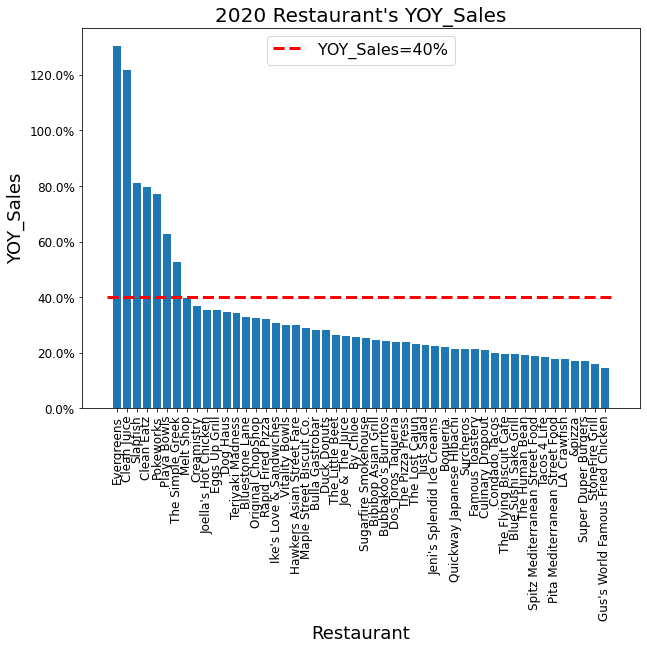

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(data.loc[:, "Restaurant"], data.loc[:, "New_YOY_Sales"])

# 设置轴标签、轴刻度
plt.xlabel("Restaurant"
          ,fontsize=18)
plt.ylabel("YOY_Sales"
          ,fontsize=18)
plt.xticks(rotation="vertical"
          ,fontsize=12)
plt.yticks(fontsize=12)
plt.title("2020 Restaurant's YOY_Sales"
         ,fontsize=20)

def to_percent(temp, position):
    return "%.1f" % temp + "%"
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))


# 绘制水平线
plt.hlines(40, -1 ,50, color="r", linestyles="--", linewidth=3, label="YOY_Sales=40%")
plt.legend(loc="upper center"
          ,fontsize=16)
plt.show()

Due to Covid-19, most of restaurant's YOY_Sales are below 40%.

# 4. 2020 Region's Sales

In [ ]:
region_ = data.groupby(["Region"]).sum()
region_.reset_index(inplace=True)
region_.head()

,Region,Rank,Sales,Units,Unit_Volume,New_YOY_Sales,New_YOY_Units
0,Ariz.,38,20,7,3120,20.8,16.7
1,Ark.,44,25,16,1620,18.4,6.7
2,Calif.,234,339,396,14490,365.7,326.4
3,Colo.,13,41,63,890,34.1,65.8
4,D.C.,47,45,35,1350,17.1,9.4


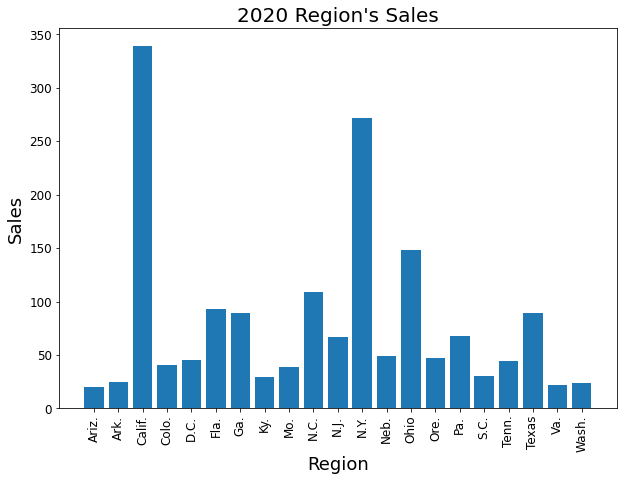

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(region_.loc[:, "Region"], region_.loc[:, "Sales"])

plt.xlabel("Region"
          ,fontsize=18)
plt.ylabel("Sales"
          ,fontsize=18)
plt.xticks(rotation="vertical"
          ,fontsize=12)
plt.yticks(fontsize=12)
plt.title("2020 Region's Sales"
         ,fontsize=20)

plt.show()

We can find that: Calif. > N.Y. > Texas

Then try to find why the sales in Calif. is the highest.

In [ ]:
# To count the number of restaurant in every region
region__ = data.groupby("Region")["Restaurant"].count()
region__ = pd.DataFrame(region__)

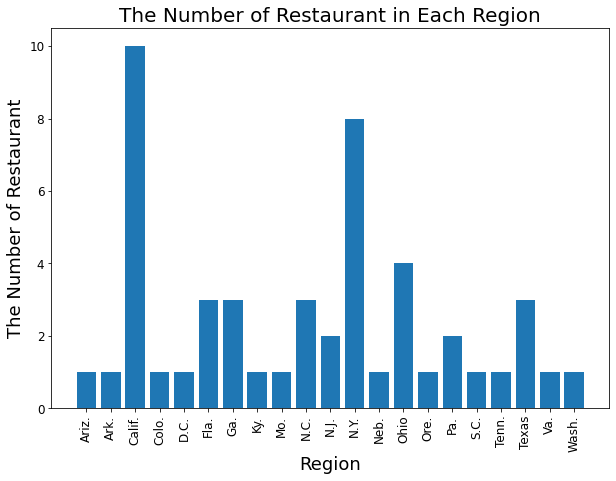

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(region__.index, region__.loc[:, "Restaurant"])
plt.xlabel("Region"
          ,fontsize=18)
plt.ylabel("The Number of Restaurant"
          ,fontsize=18)
plt.xticks(rotation="vertical"
           ,fontsize=12)
plt.yticks(fontsize=12)
plt.title("The Number of Restaurant in Each Region"
         ,fontsize=20)

plt.show()

So, we can see that there are 10 restaurants in Calif. Only 4 in Ohio. This is why the Sales in Calif. is the highest.

# 5. Relation between YOY_Sales and YOY_Units

In [ ]:
data.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising,New_YOY_Sales,New_YOY_Units,City,Region
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No,130.5,116.7,Seattle,Wash.
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes,121.9,94.4,Charlotte,N.C.
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes,81.0,90.9,Huntington Beach,Calif.
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes,79.7,58.6,Wilmington,N.C.
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes,77.1,56.3,Irvine,Calif.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


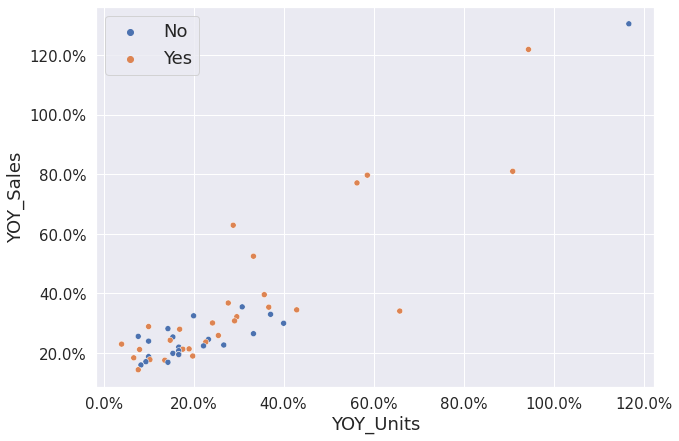

In [ ]:
plt.figure(figsize=(10, 7))
sns.set(context="notebook"
       ,style="darkgrid")

# 绘制散点图
sns.scatterplot(data.loc[:, "New_YOY_Units"], data.loc[:, "New_YOY_Sales"]
               ,hue=data.loc[:, "Franchising"])

# 设置轴坐标、轴刻度
plt.xlabel("YOY_Units"
          ,fontsize=18)
plt.ylabel("YOY_Sales"
          ,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

def to_percent(temp, position):
    return "%.1f" % temp + "%"
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.legend(fontsize=18)
plt.show()

# 6. Franchising vs. Not Franchising

In [ ]:
counts_ = []
categories_ = []
for x in data.loc[:, "Franchising"].unique():
    mask = (data.loc[:, "Franchising"] == x)
    counts_.append(data.loc[mask, "Restaurant"].count())
    categories_.append(x)

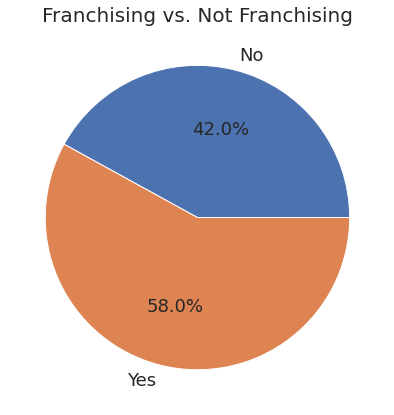

In [ ]:
plt.figure(figsize=(10, 7))
patches, l_text, p_text = plt.pie(x=counts_, labels=categories_
                                  ,autopct="%0.1f%%", radius=1
                                  ,pctdistance=0.6, labeldistance=1.1)
for t in l_text:
    t.set_size(18)
for t in p_text:
    t.set_size(18)
    
plt.title("Franchising vs. Not Franchising"
         ,fontsize=20)
plt.show()

In [ ]:
franchising_ = pd.DataFrame(data.groupby("Franchising")["Sales"].sum())
franchising_.head()

,Sales
Franchising,
No,708
Yes,981


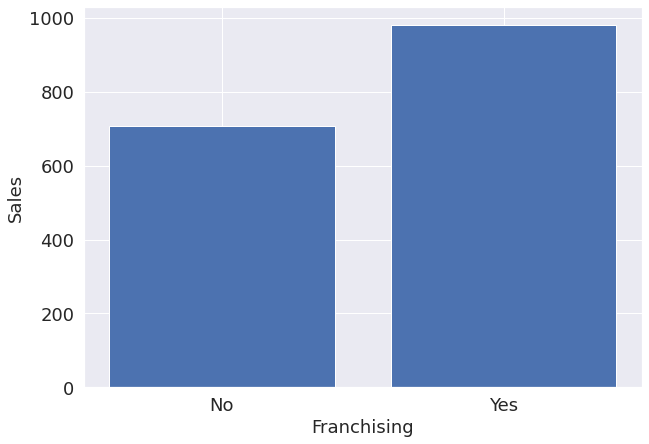

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(franchising_.index, franchising_.loc[:, "Sales"])

plt.xlabel("Franchising"
          ,fontsize=18)
plt.ylabel("Sales"
          ,fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("")
plt.show()